## EDA Project on Bank Customer Relationship

## Objective
The exploratory data analysis provided insights into the dataset's structure, missing values, data distributions, and relationships among features. Significant correlations and patterns were observed, helping in further modeling and decision-making. This analysis was conducted using Python and libraries such as Pandas, NumPy, Matplotlib, and Seaborn, aiming to provide meaningful insights from the dataset and assist in further research and decision-making.

In [36]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

![alt text](Bank.avif)

In [37]:
df = pd.read_csv("BankCustomerData.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes


This code loads the BankCustomerData.csv file into a DataFrame, making it ready for analysis and exploration.

![header bank.jpg](<attachment:header bank.jpg>)
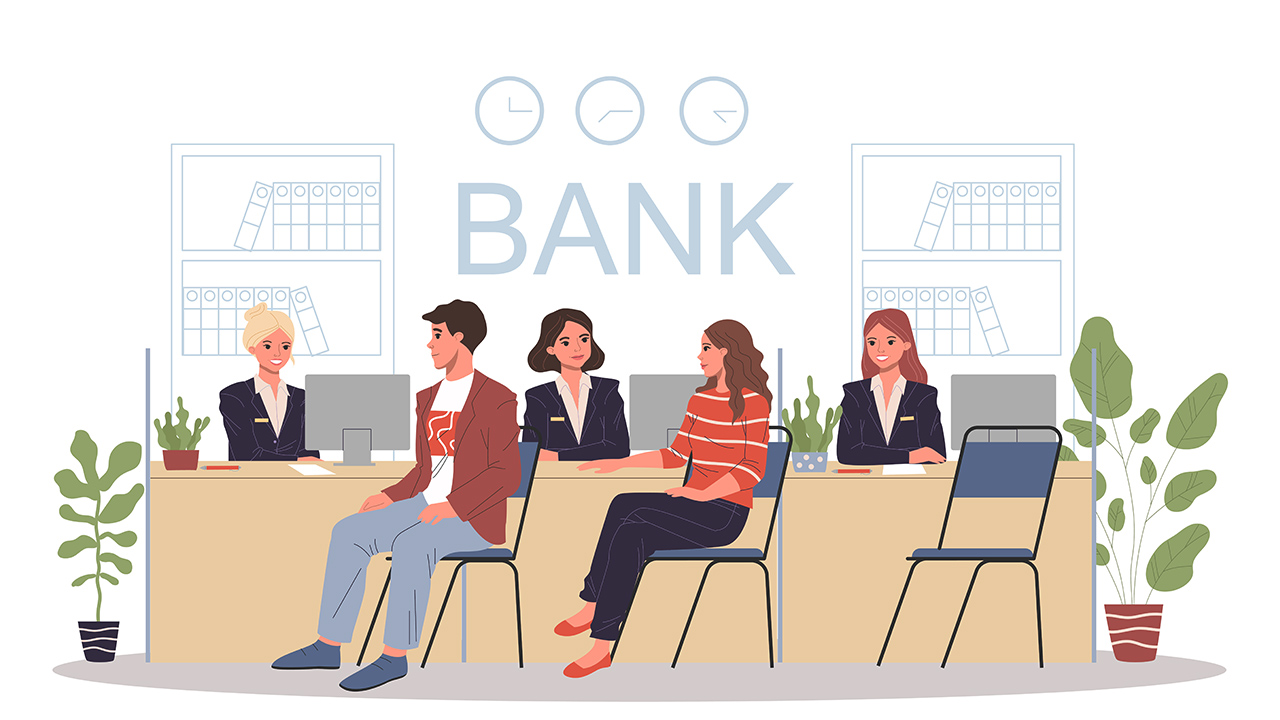

1. Data Overview

In [38]:
df.shape

(42639, 17)

This code returns the dataset's shape, indicating the number of rows (records) and columns (features) present

In [39]:
df.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
term_deposit    object
dtype: object

This code displays the data types of each column, helping to understand whether the features are numerical, categorical, or of another type.

In [40]:
df.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64

This code checks for missing values in each column, helping to identify data gaps that may require cleaning or imputation.

In [41]:
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols].nunique()

job             12
marital          3
education        4
default          2
housing          2
loan             2
contact          3
month           12
poutcome         4
term_deposit     2
dtype: int64

This code counts the number of unique values in each categorical column, helping to understand the diversity and variability of categorical data.

In [42]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
df[numerical_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


This code provides summary statistics for numerical columns, including count, mean, min, max, and quartiles, helping to understand data distribution and variability.

![alt text](bank-finance.avif)

2. Data Cleaning & Preprocessing

In [43]:
df.duplicated().sum()

0

This code checks for duplicate rows in the dataset, helping to identify redundancy that may need to be removed for accurate analysis.

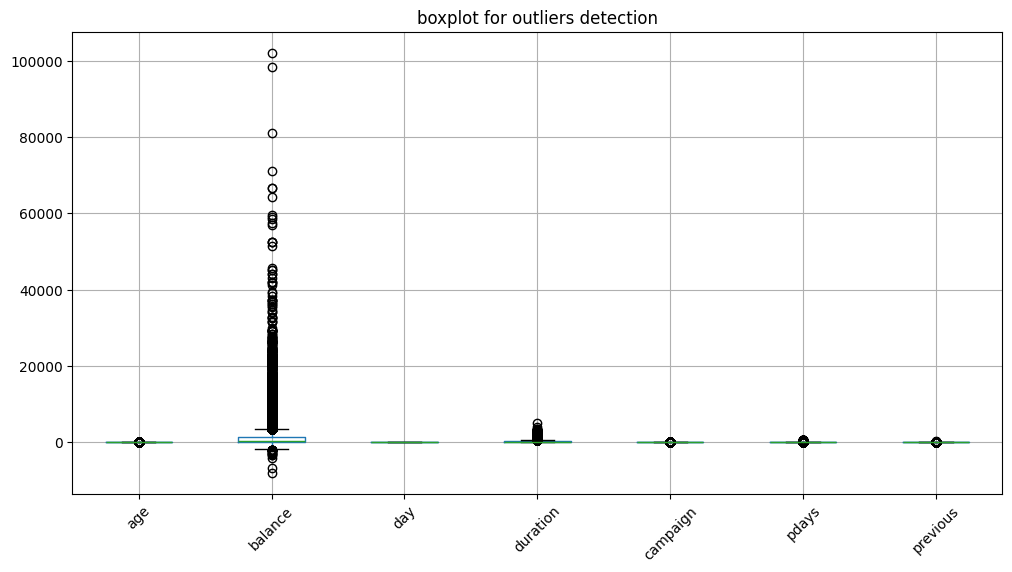

In [45]:
plt.figure(figsize=(12,6))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('boxplot for outliers detection')
plt.show()

This boxplot visually highlights potential outliers in the numerical columns by displaying extreme values beyond the typical range. It helps identify anomalies that may need further investigation or treatment.

3. Univariate Analysis

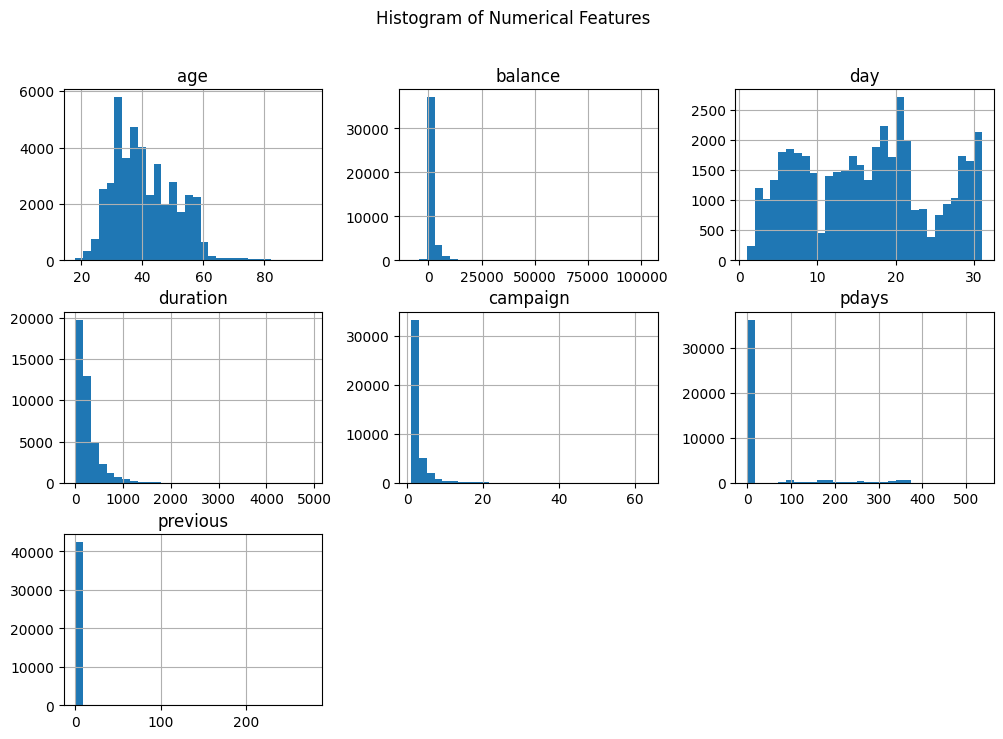

In [46]:
df[numerical_cols].hist(figsize=(12, 8), bins=30)
plt.suptitle("Histogram of Numerical Features")
plt.show()

This histogram provides a visual representation of the distribution of numerical features, helping to identify skewness, peaks, and patterns in the data. It allows us to understand how values are spread across different ranges.

In [47]:
for col in categorical_cols:
    print(f"Top 5 most frequent values for {col}:{df[col].value_counts().head(5)}")

Top 5 most frequent values for job:job
blue-collar    9536
management     8851
technician     7223
admin.         4810
services       4033
Name: count, dtype: int64
Top 5 most frequent values for marital:marital
married     25868
single      11806
divorced     4965
Name: count, dtype: int64
Top 5 most frequent values for education:education
secondary    22066
tertiary     12302
primary       6581
unknown       1690
Name: count, dtype: int64
Top 5 most frequent values for default:default
no     41828
yes      811
Name: count, dtype: int64
Top 5 most frequent values for housing:housing
yes    24590
no     18049
Name: count, dtype: int64
Top 5 most frequent values for loan:loan
no     35554
yes     7085
Name: count, dtype: int64
Top 5 most frequent values for contact:contact
cellular     27218
unknown      12776
telephone     2645
Name: count, dtype: int64
Top 5 most frequent values for month:month
may    13532
jul     6587
aug     5987
jun     5128
nov     3895
Name: count, dtype: int64


This code identifies the top 5 most frequently occurring values in each categorical column, helping to understand dominant categories. It provides insights into common patterns and potential imbalances in categorical data

In [48]:
skewness = df[numerical_cols].skew()
skewness

age          0.592261
balance      8.325193
day          0.091670
duration     3.152038
campaign     4.824809
pdays        2.598776
previous    52.085767
dtype: float64

This code calculates the skewness of numerical features, helping to determine whether the data distribution is symmetric or biased toward higher or lower values.

4. Bivariate Analysis

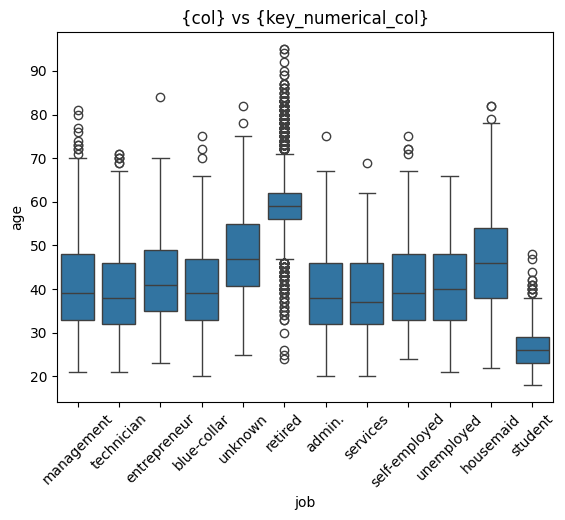

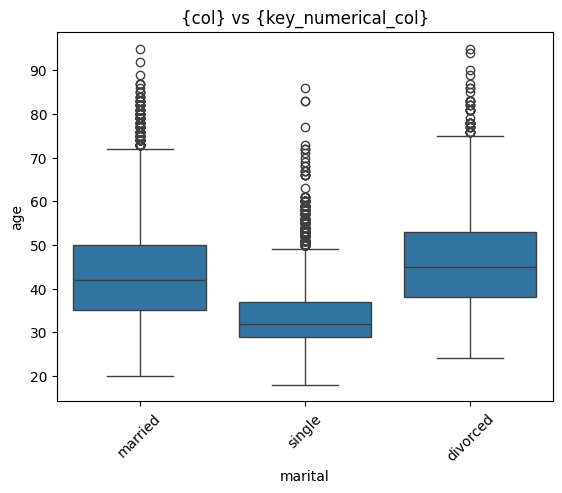

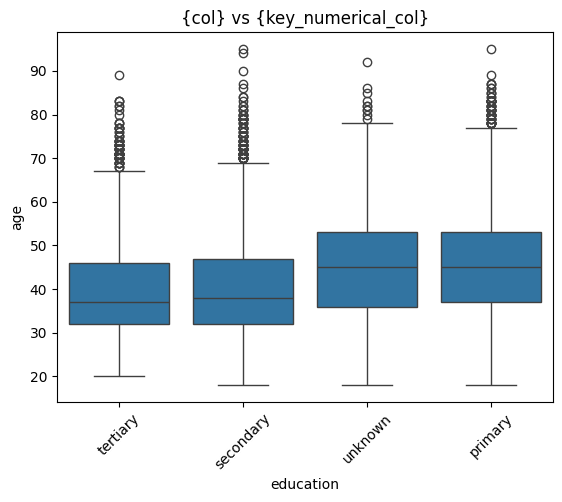

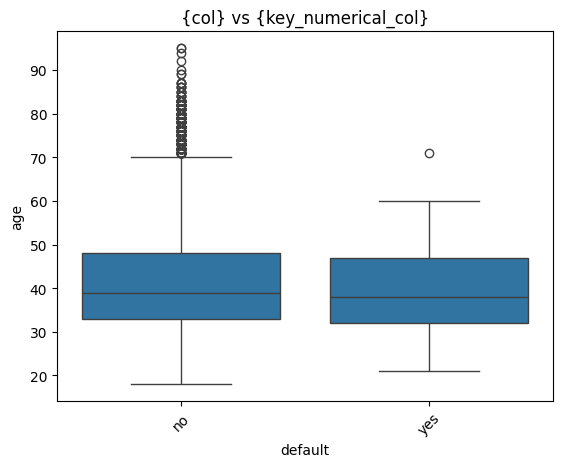

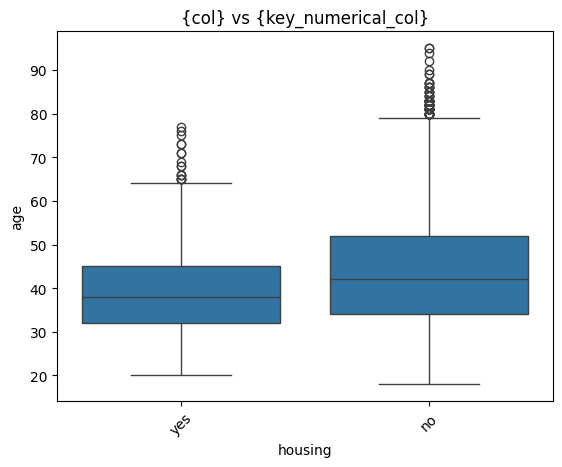

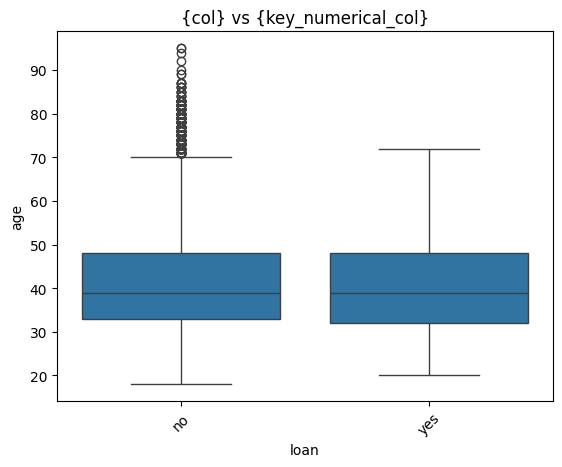

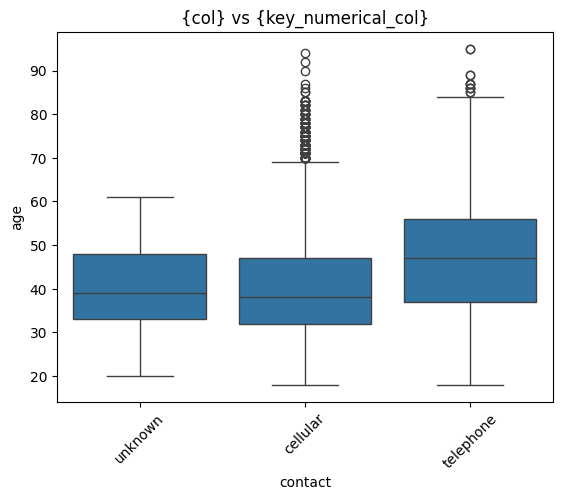

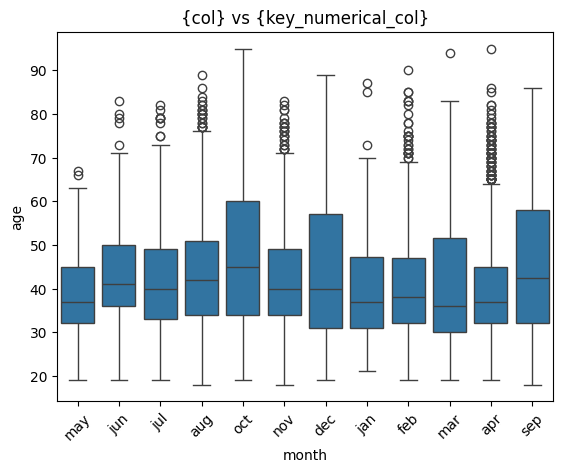

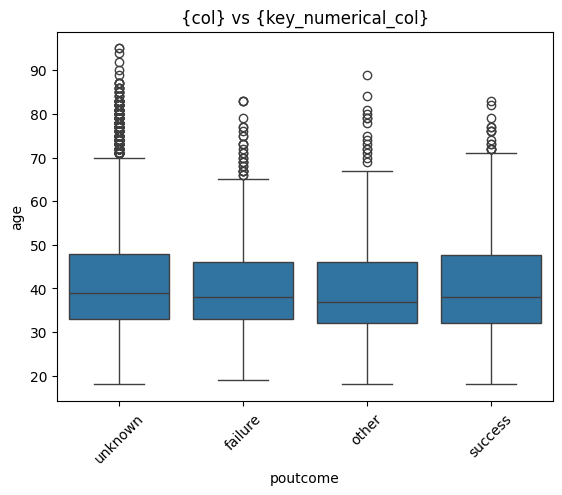

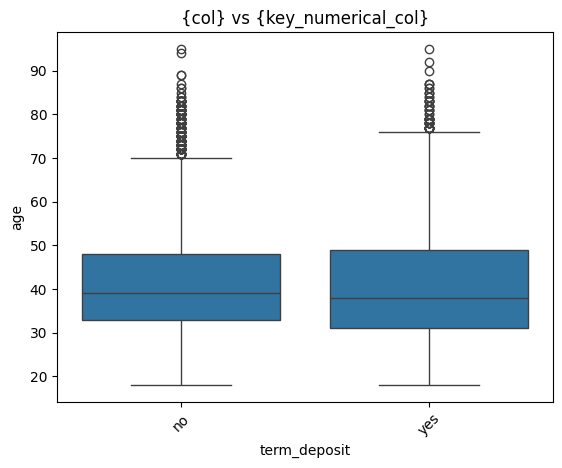

In [49]:
key_numerical_col = numerical_cols[0]  # Select a key numerical column
for col in categorical_cols:
    sns.boxplot(x=col, y=key_numerical_col, data=df)
    plt.xticks(rotation=45)
    plt.title("{col} vs {key_numerical_col}")
    plt.show()

This code visualizes the relationship between categorical variables and a key numerical feature using boxplots, helping to identify variations across categories. It highlights differences in distributions and potential influences of categorical factors on numerical values

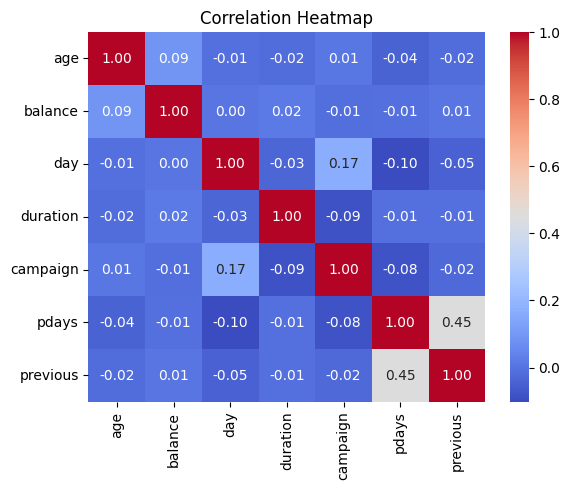

In [50]:
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

This correlation heatmap visually represents the relationships between numerical features, highlighting strong positive or negative correlations. It helps in identifying highly related variables, which can guide feature selection and multicollinearity analysis.

5. Multivariate Analysis

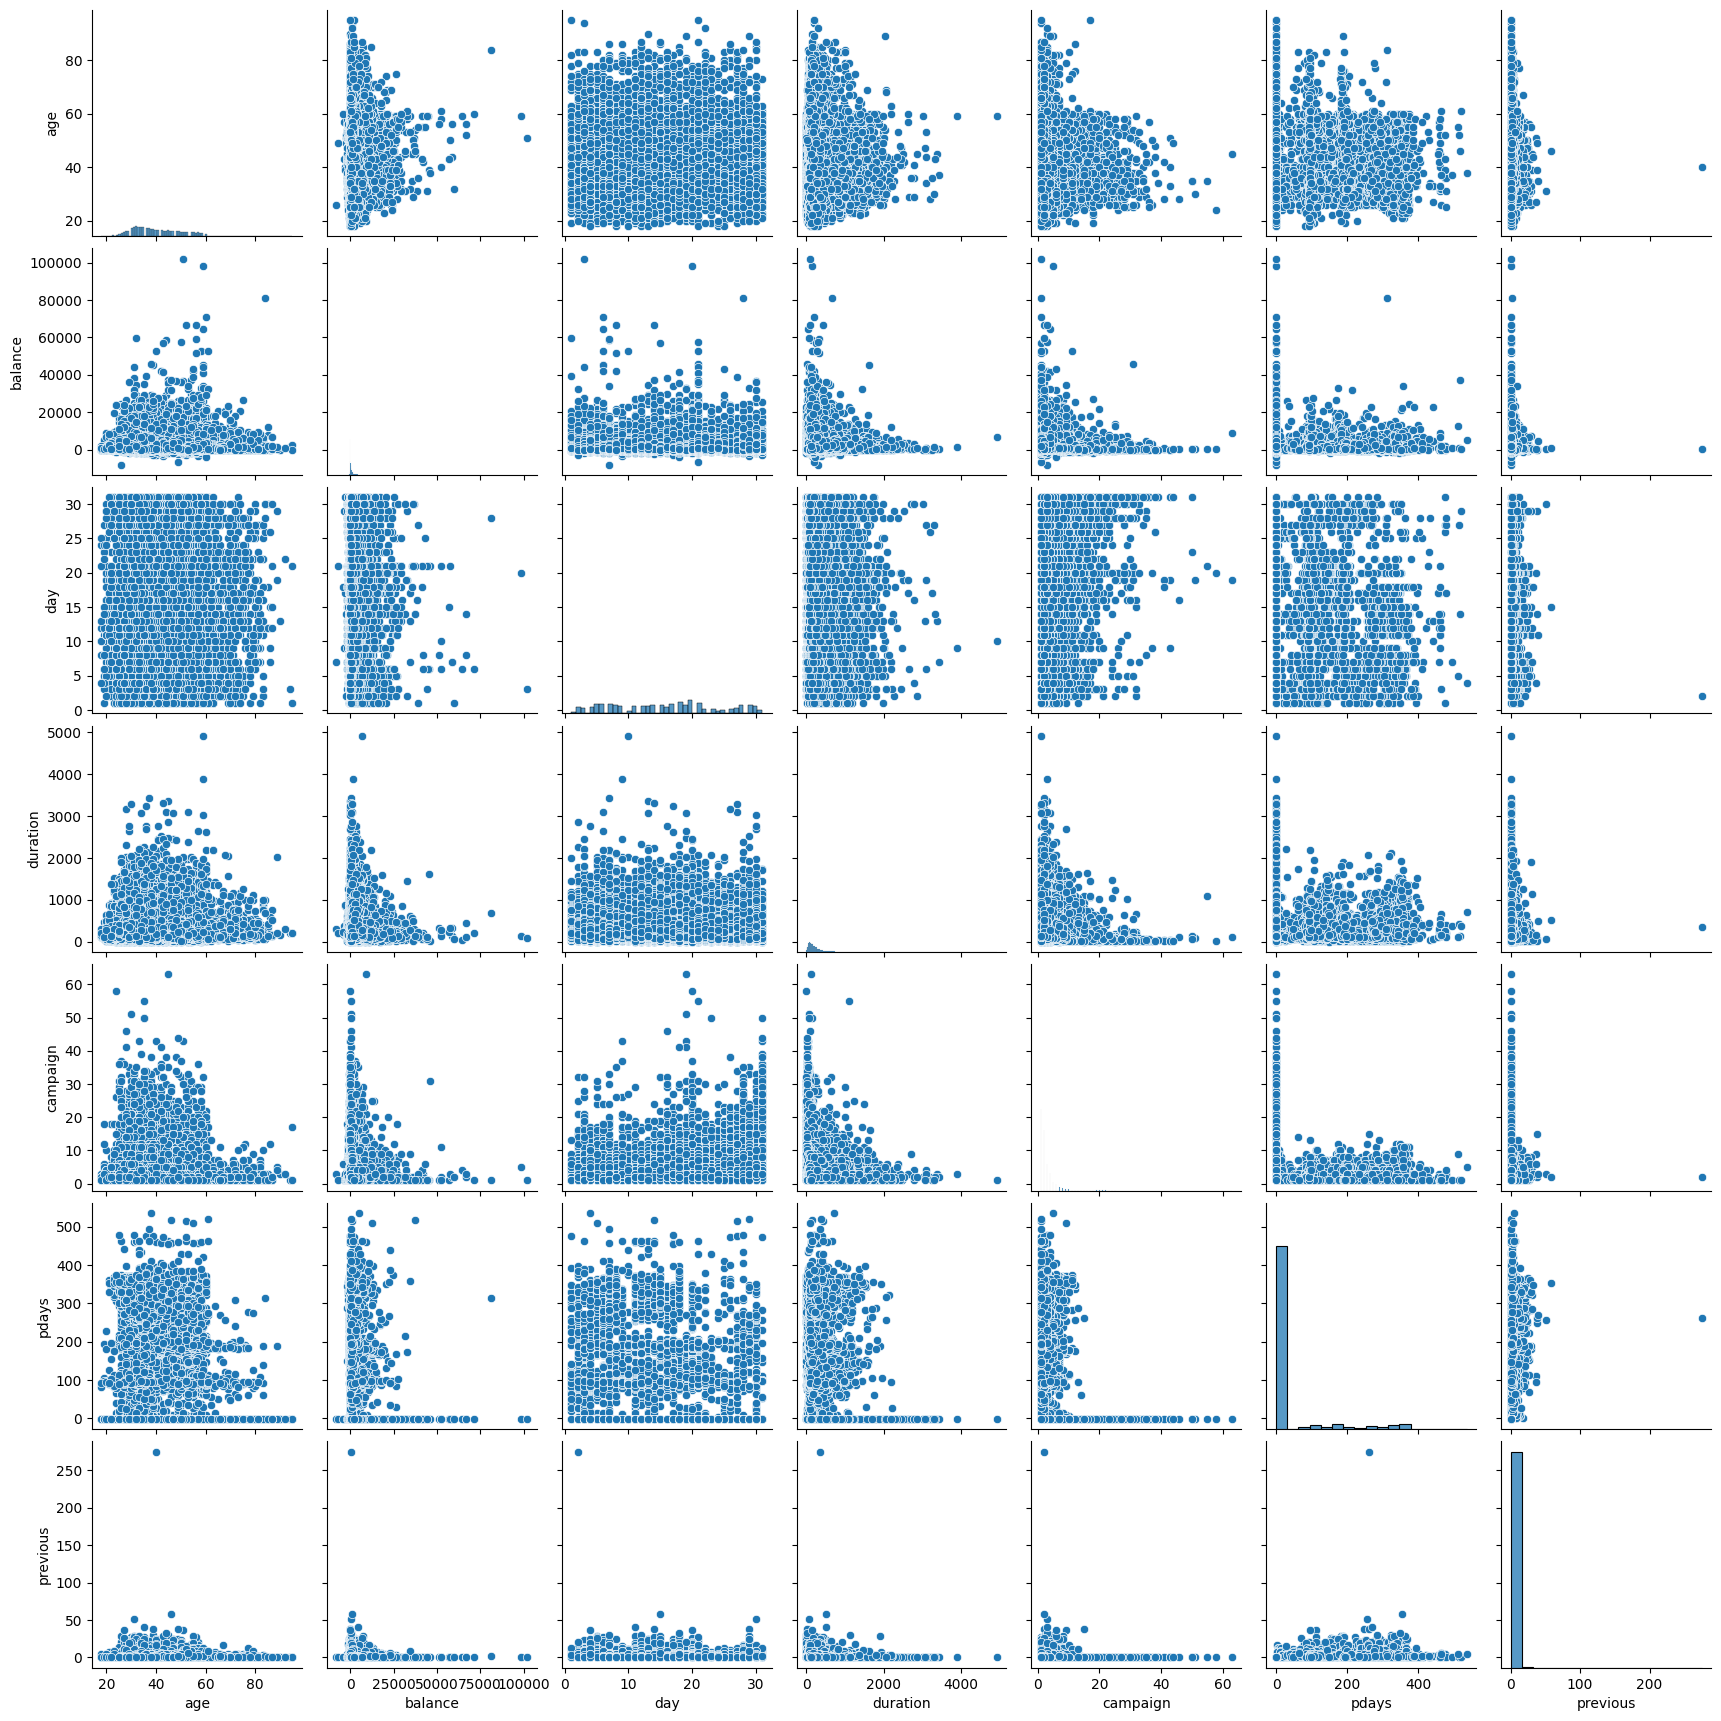

In [51]:
sns.pairplot(df[numerical_cols])
plt.show()

This pairplot visually explores relationships between numerical features, helping to identify trends, correlations, and potential patterns in the data.

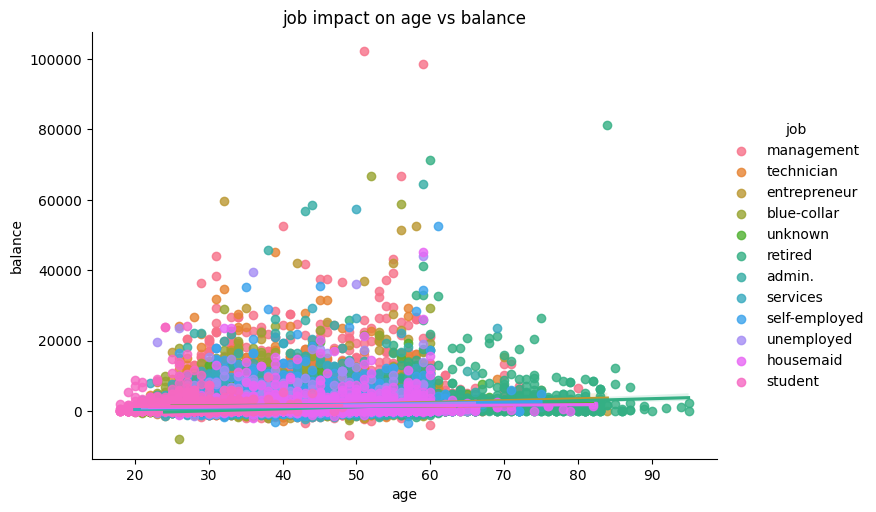

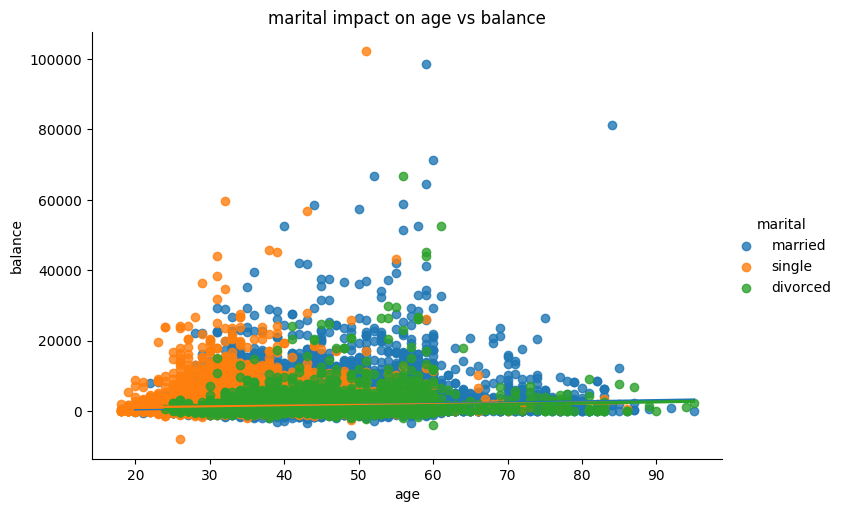

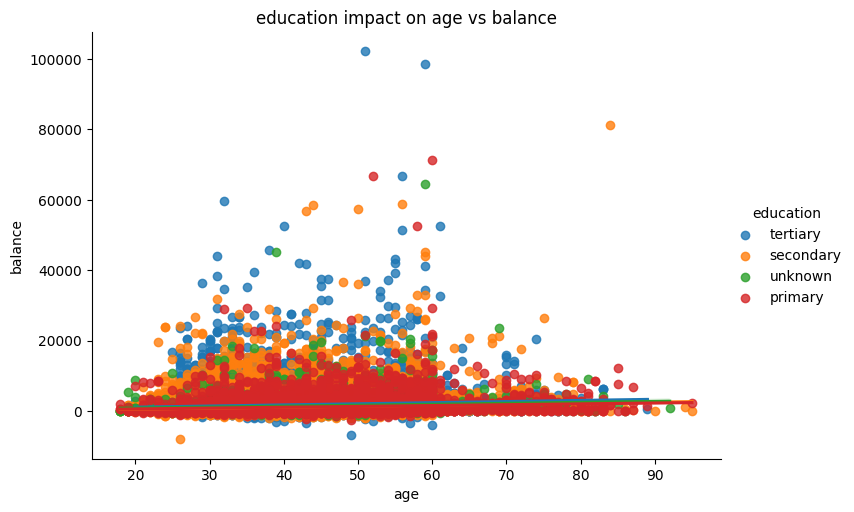

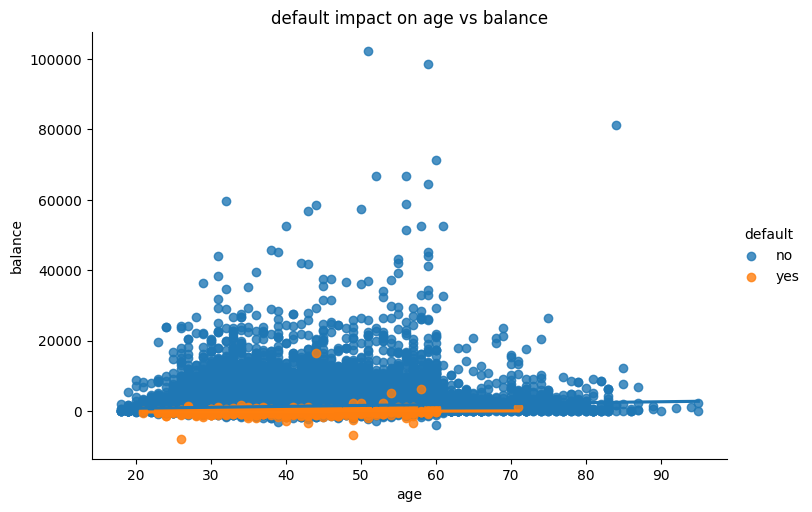

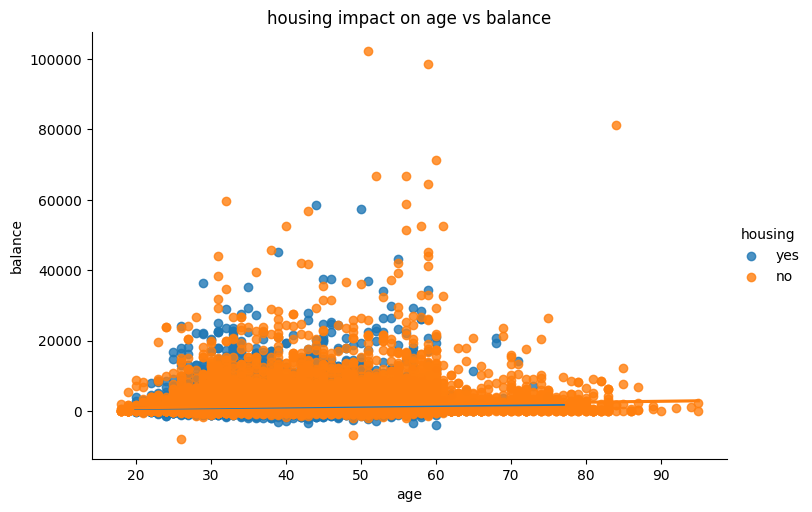

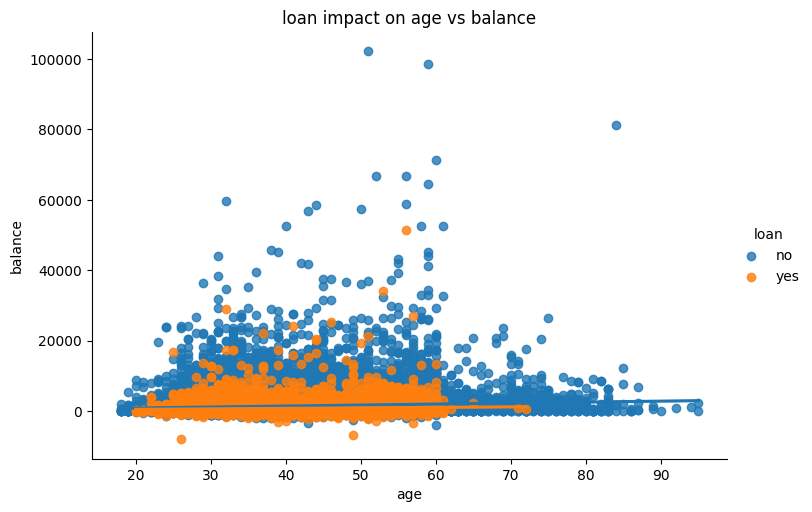

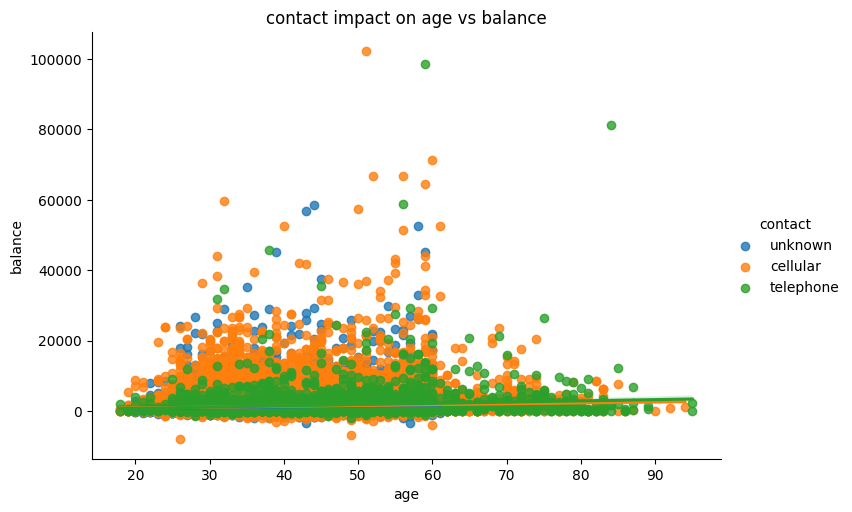

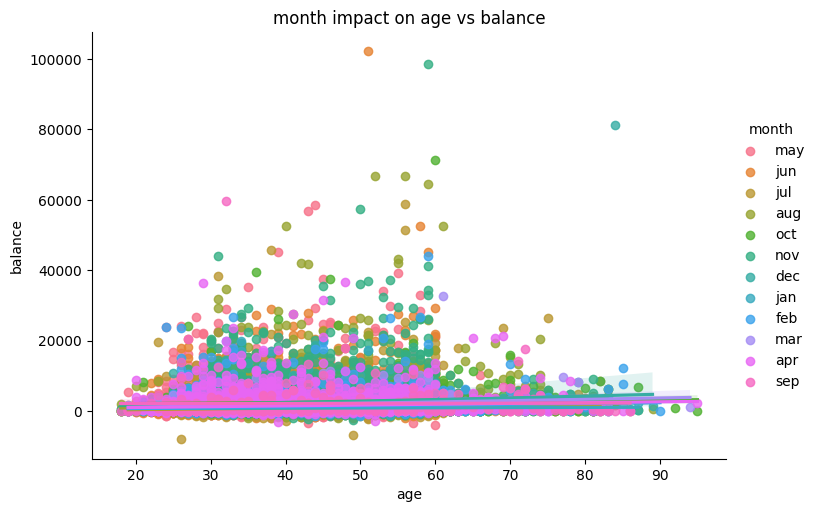

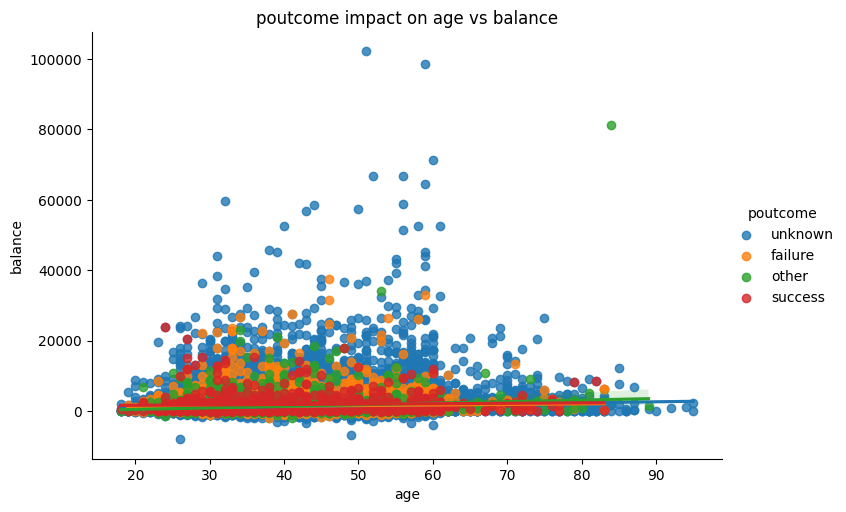

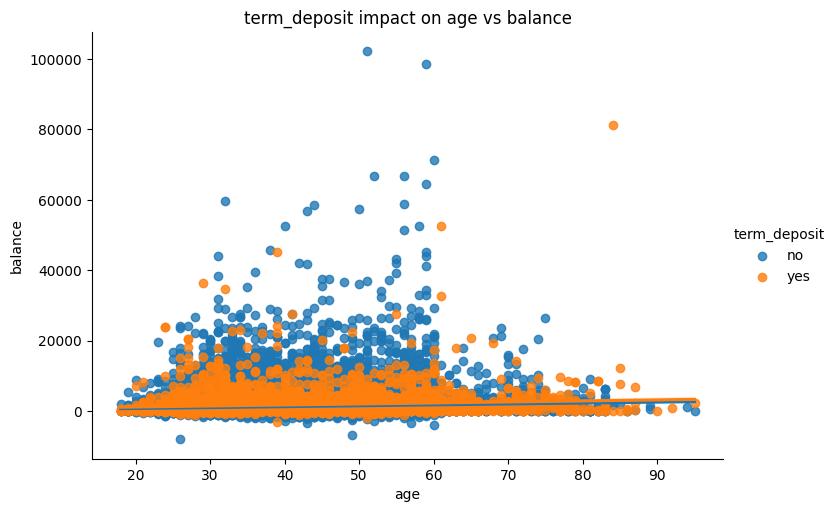

In [52]:
for col in categorical_cols:
    sns.lmplot(x=numerical_cols[0], y=numerical_cols[1], hue=col, data=df, aspect=1.5)
    plt.title(f"{col} impact on {numerical_cols[0]} vs {numerical_cols[1]}")
    plt.show()

This code uses linear regression plots to analyze how different categorical variables impact the relationship between two numerical features. It helps in understanding category-wise trends, variations, and possible interactions between numerical and categorical data.

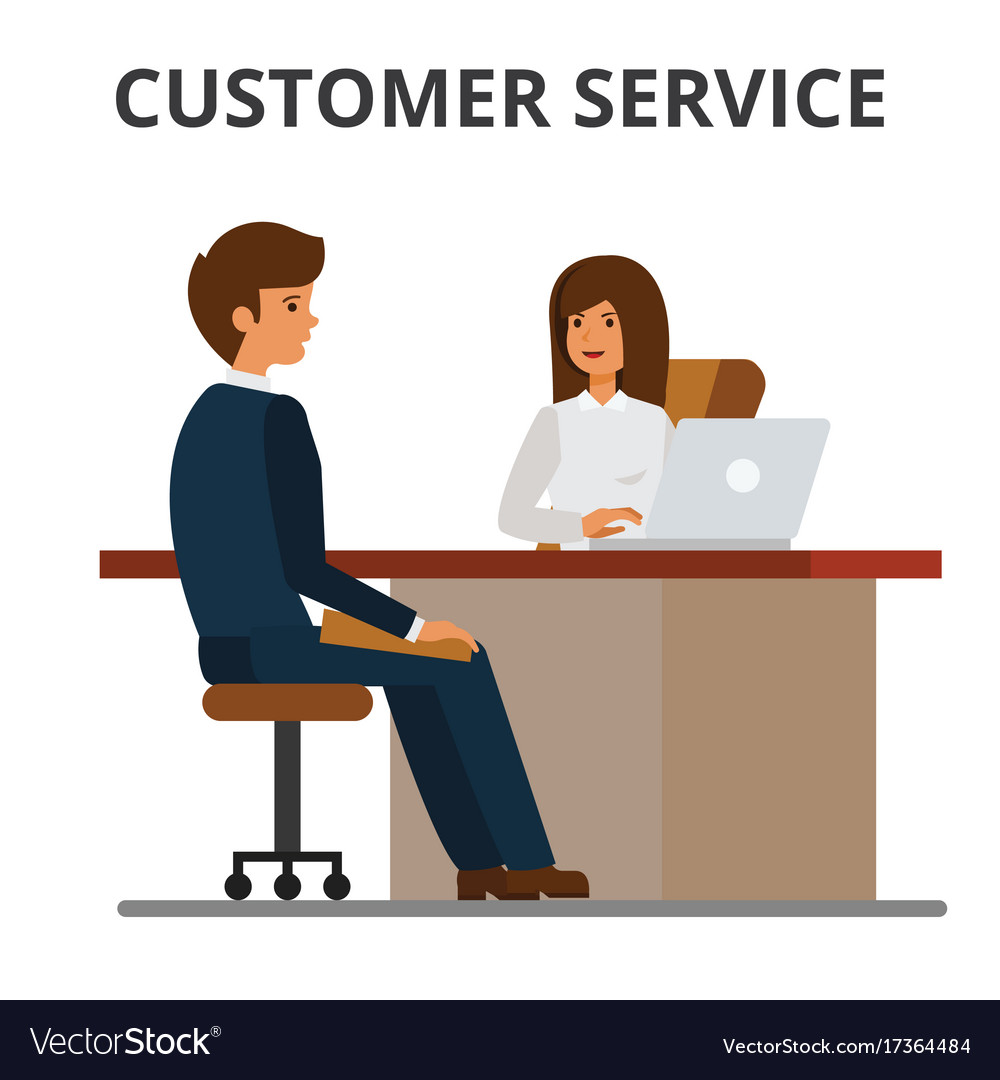